In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

In [0]:
# First we want to make a toy problem
def make_toy(N=1000):
  x = np.random.uniform(0, 1, (N,1)).astype(np.float32)
  point_1 = np.random.normal(1, .1, (int(N/2), 1)).astype(np.float32)
  point_2 = np.random.normal(2, .1, (int(N/2), 1)).astype(np.float32)
  y = np.concatenate((point_1, point_2)).astype(np.float32)
  np.random.shuffle(y)
  return x, y

In [0]:
X, y = make_toy()

In [4]:
y.shape

(1000, 1)

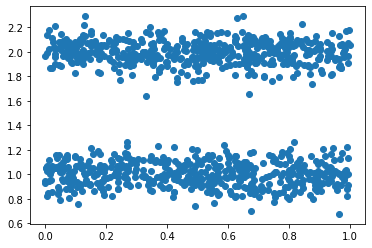

In [5]:
plt.figure()
plt.scatter(X, y)

In [0]:
# Now we want to choose 2 means
mean_0 = np.array([.1, 1.6])
mean_1 = np.array([.8, 1.4])

def update_mean(clusters_1, clusters_2):
  mean_0_new = np.array([np.mean(clusters_1[:, 0]), np.mean(clusters_1[:, 1])])
  mean_1_new = np.array([np.mean(clusters_2[:, 0]), np.mean(clusters_2[:, 1])])
  return mean_0_new, mean_1_new

def sort_k(X, y, mean_0, mean_1):
  r_1 = []
  r_2 = []
  for Xi, yi in zip(X,  y):
    test_1 = np.dot(np.array([Xi[0], yi[0]])-mean_0, np.array([Xi[0], yi[0]])-mean_0)
    test_2 = np.dot(np.array([Xi[0], yi[0]])-mean_1, np.array([Xi[0], yi[0]])-mean_1)
    if test_1 < test_2:
      r_1.append((Xi, yi))
    else:
      r_2.append((Xi, yi))
  r_1, r_2 = np.array(r_1), np.array(r_2)
  return r_1, r_2, mean_0, mean_1


In [0]:
r_1, r_2, _, _ = sort_k(X, y, mean_0, mean_1)
mean_0_new, mean_1_new = update_mean(r_1, r_2)

In [9]:
np.concatenate((r_1, r_2)).shape

(1000, 2, 1)

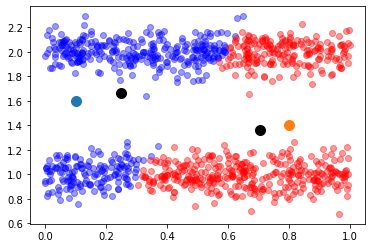

In [10]:
plt.figure()
# plt.plot(X, y, 'ko', alpha=.4)
plt.scatter(mean_0[0], mean_0[1], s=100)
plt.scatter(mean_1[0], mean_1[1], s=100)
plt.plot(r_1[:,0], r_1[:, 1], 'bo', alpha=.4)
plt.plot(r_2[:,0], r_2[:,1], 'ro', alpha=.4)
plt.scatter(mean_0_new[0], mean_0_new[1], c='k', s=100)
plt.scatter(mean_1_new[0], mean_1_new[1], c='k', s=100)

In [0]:
# Now iterate untill convergence

def k_means(X,y):
  # Initialize
  mean_0 = np.random.randint(0, 1, (2))
  mean_1 = np.random.randint(1, 3, (2))
  r_1, r_2, _, _ = sort_k(X, y, mean_0, mean_1)
  mean_0_new, mean_1_new = update_mean(r_1, r_2)
  tol=1e3
  i=0
  while tol > 1e-12:
      r = np.concatenate((r_1, r_2))
      X, y = r[:, 0], r[:,1]
      r_1, r_2, mean_0, mean_1 = sort_k(X, y, mean_0_new, mean_1_new)
      mean_0_new, mean_1_new = update_mean(r_1, r_2)
      tol = np.mean([mean_0_new-mean_0, mean_1_new-mean_1])
      print(f'iteration: {i}')
      i+=1
  return r_1, r_2, mean_0_new, mean_1_new

In [12]:
r_1, r_2, mean_0, mean_1 = k_means(X, y)

iteration: 0
iteration: 1
iteration: 2
iteration: 3


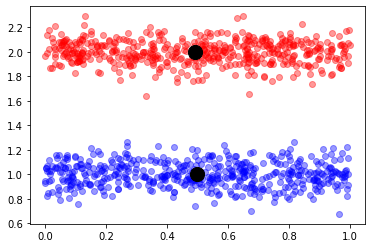

In [13]:
plt.figure()
# plt.plot(X, y, 'ko', alpha=.4)
plt.scatter(mean_0[0], mean_0[1], s=200, zorder=2.5, c='k')
plt.scatter(mean_1[0], mean_1[1], s=200, zorder=2.5, c='k')
plt.plot(r_1[:,0], r_1[:, 1], 'bo', alpha=.4)
plt.plot(r_2[:,0], r_2[:,1], 'ro', alpha=.4)

In [0]:
mean_0

array([0.49926934, 1.998417  ], dtype=float32)